# 1-qubit contorol simulation

In [49]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import jit
from functools import partial
from jax.scipy.linalg import expm

%load_ext autoreload
%autoreload 2
from my_package import quantum_state as qs
from my_package import quantum_operator as qo
from my_package import math_tool as mt

## Hamiltonian (two-level approximation)

The Hamiltonian for a single transmon and a resonator can be written as follows:
$$
\begin{align}
\hat{H}_{\rm 1q} / \hbar &= \left\{ \omega_{\rm q} - \chi \left( 1 + 2 \hat{a}^\dagger \hat{a} \right) \right\} \frac{\hat{\sigma}_{\rm z}}{2} + \omega_{\rm r} \hat{a}^\dagger \hat{a} \\
\hat{H}_{\rm drive} / \hbar &= \Omega (t) \left( \hat{a}^\dagger e^{-i\omega_{\rm d}t} + \hat{a} e^{i\omega_{\rm d}t} \right) + \frac{\Omega (t)}{\Delta_{\rm qr}} g \left( \hat{\sigma}_+ e^{-i\omega_{\rm d}t} + \hat{\sigma}_-e^{i\omega_{\rm d}t} \right)
\end{align}
$$
full Hamiltonian:

$$
\begin{align}
\hat{H}_{\rm full} / \hbar 
&= \hat{H}_{\rm 1q} + \hat{H}_{\rm drive} \\
&= \left\{ \omega_{\rm q} - \chi \left( 1 + 2 \hat{a}^\dagger \hat{a} \right) \right\} \frac{\hat{\sigma}_{\rm z}}{2} + \omega_{\rm r} \hat{a}^\dagger \hat{a} + \Omega (t) \left( \hat{a}^\dagger e^{-i\omega_{\rm d}t} + \hat{a} e^{i\omega_{\rm d}t} \right) + \frac{\Omega (t)}{\Delta_{\rm qr}} g \left( \hat{\sigma}_+ e^{-i\omega_{\rm d}t} + \hat{\sigma}_-e^{i\omega_{\rm d}t} \right)
\end{align}
$$
We
$$
\begin{align}
\hat{H}_{\rm full}^{\rm rot} / \hbar 
&= \left( \omega_{\rm r}-\omega_{\rm d}  \right) \hat{a}^\dagger \hat{a} + \Omega (t) \left( \hat{a}+\hat{a}^\dagger \right) + \left[ \omega_{\rm q}-\chi \left( 1+2\hat{a}^\dagger \hat{a} \right) -\omega_{\rm d} \right] \frac{\hat{\sigma}_{\rm z}}{2} - \frac{4g \Omega (t)}{\Delta_{\rm qr}} \frac{\hat{\sigma}_{\rm x}}{2}
\end{align}
$$
We consider the case of $\omega_{\rm d} = \omega_{\rm q}-\chi$
$$
\begin{align}
\hat{H}_{\rm full}^{\rm rot} / \hbar 
&= 
\end{align}
$$

In [12]:
# setting params
hbar = 1
w_q = 1
w_r = 1
delta_qr = w_r - w_q
chi = 

# setting operators
dim = 10**3
a = mt.tensor_prod(qo.identity(2), qo.annihilate(dim))
a_dag = mt.tensor_prod(qo.identity(2), qo.create(dim))
pauli_z = mt.tensor_prod(qo.pauli_z(), qo.identity(dim))
pauli_x = mt.tensor_prod(qo.pauli_x(), qo.identity(dim))

# initial state
init_state = mt.tensor_prod(qs.n_qubit(1), qs.vaccum(dim))

# Hamiltonian
H = 
time_eval_ops = expm(H)

Array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]], dtype=complex64)

## Rabi oscillation

### Schrodinger equation solver

In [ ]:
@partial(jit, static_argnums=(0, 1, 2, 3, 4, ))
def Schrodinger(H: jnp.ndarray, init_vec: jnp.ndarray, start_time: float, end_time: float, time_step: float) -> jnp.ndarray:
    """
    Solve the Schrodinger equation.
    Args:
        H: Hamiltonian
        init_vec: initial state vector
        t_span: tuple, (t_start, t_end), the time range.
        dt: float, time step.
        hbar: float, Planck's constant divided by 2π (default: 1.0).
    
    Returns:
        t_vals: jnp.ndarray, array of time points.
        rho_t: jnp.ndarray, array of density matrices at each time point.
    """
    rhs = -1.0j * H
    equation = lambda t, vec, args: rhs
    ode = ODETerm(equation)
    integrator = Dopri5()
    saveat = SaveAt(ts=jnp.arange(start_time, end_time, time_step))
    stepsize_controller = PIDController(rtol=1e-5, atol=1e-5)

    solver = diffeqsolve(ode, integrator, t0=start_time, t1=end_time, dt0=step_time, y0=vec_0, saveat=saveat, stepsize_controller=stepsize_controller)
    
    return solver

In [ ]:
@partial(jit, static_argnums=(0, 1, 2, 3, 4, ))
def constant(amp, dt) -> float:
    f = lambda amp, t, freq: jnp.where(jnp.sin(2 * jnp.pi * frequency * t) >= 0, amp, 0.0)
    return 

In [ ]:
class Pulse_Scheduler(self, ):
    def 

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

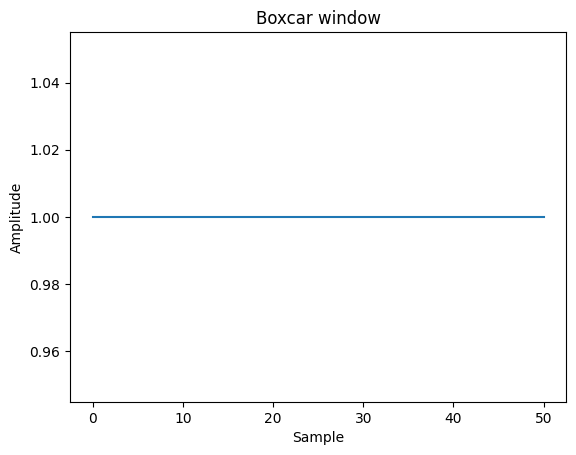

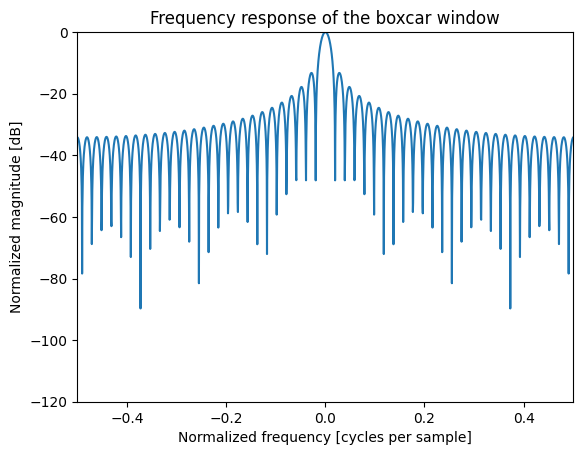

In [9]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
window = signal.windows.boxcar(51)
plt.plot(window)
plt.title("Boxcar window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the boxcar window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

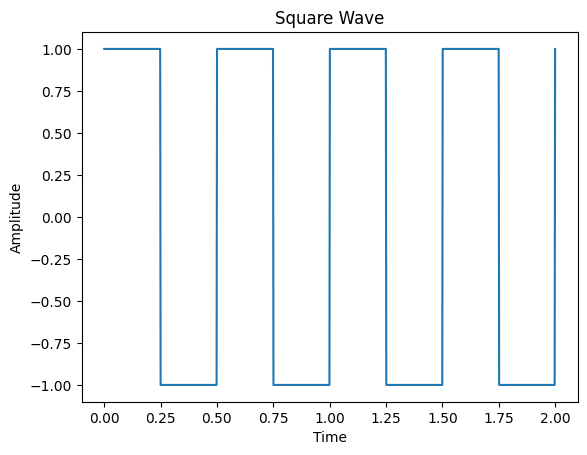

In [2]:
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt
import numpy as np

@jit
def square_wave(t, frequency=1.0):
    return jnp.where(jnp.sin(2 * jnp.pi * frequency * t) >= 0, 1.0, -1.0)

# 時間軸のサンプルを生成（例: 0～2秒を 1000 点）
t = jnp.linspace(0, 2, 1000)
wave = square_wave(t, frequency=2.0)

# 結果をプロット（JAX の配列を NumPy 配列に変換）
plt.plot(t, wave)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Square Wave")
plt.show()

In [37]:
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

dim = 10**4
key = jax.random.PRNGKey(0)
A = jax.random.normal(key, (dim, dim))

def python_loop(n):
    result = jnp.eye(dim)
    for i in range(n):
        result = jnp.dot(result, A)
    return result

def fori_loop(n):
    def body(i, carry):
        return jnp.dot(carry, A)
    return jax.lax.fori_loop(0, n, body, jnp.eye(dim))
    
@partial(jit, static_argnums=(0, ))
def fori_loop_jit(n):
    def body(i, carry):
        return jnp.dot(carry, A)
    return jax.lax.fori_loop(0, n, body, jnp.eye(dim))

In [ ]:
%timeit -n 1 -r 100 python_loop(10**4)

In [ ]:
%timeit -n 1 -r 100 jax_loop(10**4)

In [ ]:
%timeit -n 1 -r 100 jax_loop_jit(10**4)